In [167]:
from __future__ import print_function  # used for making Python 2 print function act like python3 function

In [1]:
import pandas as pd
%matplotlib inline

# Stroop Data Analysis in Pandas

## 1. Load Data into a Pandas DataFrame

In [2]:
df = pd.read_csv('StroopData.csv')
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time
0,Y,Y,1.0,156772.0,Y,1389.0
1,G,G,2.0,156772.0,G,2043.0
2,R,R,3.0,156772.0,R,1389.0
3,Y,Y,4.0,156772.0,Y,1092.0
4,G,G,5.0,156772.0,G,1310.0


How Many Trials were there in total, across all subjects?

In [3]:
len(df)

2803

In [4]:
df.shape

(2803, 6)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2803 entries, 0 to 2802
Data columns (total 6 columns):
respcolor        2803 non-null object
stimcolor        2803 non-null object
trialnum         2803 non-null float64
subject          2803 non-null float64
stimword         2803 non-null object
reaction_time    2803 non-null float64
dtypes: float64(3), object(3)
memory usage: 131.5+ KB


In [6]:
df.count()

respcolor        2803
stimcolor        2803
trialnum         2803
subject          2803
stimword         2803
reaction_time    2803
dtype: int64

What was the Maximum number of trials any subject did? The minimum?

In [7]:
max(df['trialnum'])

90.0

In [8]:
df['trialnum'].max()

90.0

How Many subjects were there in this study?

In [18]:
len(set(df['subject']))

32

In [20]:
len(df['subject'].unique())

32

In [15]:
len(df.groupby('subject'))

32

What is the mean response Time, across all subjects and conditions?

In [22]:
import statistics
statistics.mean(df['reaction_time'])

1703.5362112022833

In [23]:
df['reaction_time'].mean()

1703.5362112022833

In [25]:
import numpy as np
np.mean(df['reaction_time'])

1703.5362112022833

Plot a histogram of the response times

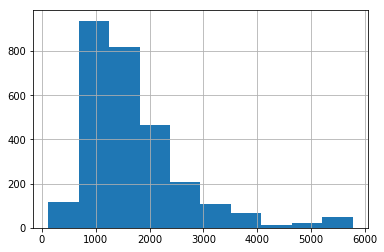

In [26]:
df['reaction_time'].hist()

What was the mean response time for each subject?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fae3d4eada0>]],
      dtype=object)

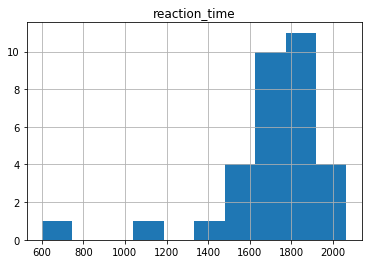

In [30]:
df.groupby('subject')[['reaction_time']].mean().hist()

Log transform the reaction Times

In [31]:
df['reaction_time_log'] = np.log(df['reaction_time'])
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_log
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782


In [33]:
df['reaction_time_log2'] = df['reaction_time'].transform(np.log)
df.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_log,reaction_time_log2
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782,7.177782


In [41]:
df.loc[[2], ['stimcolor']]

,stimcolor
2,R


Reject Bad Data: Log Reaction Time < 5.7

In [44]:
df.loc[df['reaction_time_log'] >= 5.7].head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_log,reaction_time_log2
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782,7.177782


In [57]:
df_good = df.query('reaction_time_log >= 5.7')
df_good.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_log,reaction_time_log2
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,7.236339
1,G,G,2.0,156772.0,G,2043.0,7.622175,7.622175
2,R,R,3.0,156772.0,R,1389.0,7.236339,7.236339
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,6.995766
4,G,G,5.0,156772.0,G,1310.0,7.177782,7.177782


In [56]:
# df.drop(index=(df['reaction_time_log'] < 5.7).values, axis=0)

From here on, use only the accepted data!

In [62]:
df_good = df_good.copy()

## Overall, what was the accuracy of the responses?

  - How many trials, in total, were correct (stimcolor matched respcolor)?
  - How many trials were incorrect?
  - What percent accuract was there, overall?

In [70]:
df_good['isCorrect'] = df_good['stimcolor'] == df_good['respcolor']
df_good.head()

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_log,reaction_time_log2,isCorrect
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,7.236339,True
1,G,G,2.0,156772.0,G,2043.0,7.622175,7.622175,True
2,R,R,3.0,156772.0,R,1389.0,7.236339,7.236339,True
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,6.995766,True
4,G,G,5.0,156772.0,G,1310.0,7.177782,7.177782,True


In [88]:
df_good.query("stimword == 'Y' & repcolor == 'B' \"  aaa \" ")

,respcolor,stimcolor,trialnum,subject,stimword,reaction_time,reaction_time_log,reaction_time_log2,isCorrect
0,Y,Y,1.0,156772.0,Y,1389.0,7.236339,7.236339,True
3,Y,Y,4.0,156772.0,Y,1092.0,6.995766,6.995766,True
7,Y,Y,8.0,156772.0,Y,936.0,6.841615,6.841615,True
12,Y,Y,13.0,156772.0,Y,1029.0,6.936343,6.936343,True
14,Y,Y,15.0,156772.0,Y,1560.0,7.352441,7.352441,True
21,Y,Y,22.0,156772.0,Y,1029.0,6.936343,6.936343,True
23,Y,Y,24.0,156772.0,Y,968.0,6.875232,6.875232,True
25,Y,Y,26.0,156772.0,Y,936.0,6.841615,6.841615,True
29,Y,Y,30.0,156772.0,Y,733.0,6.597146,6.597146,True
31,Y,Y,32.0,156772.0,Y,905.0,6.807935,6.807935,True


In [71]:
df_good['isCorrect'].mean()

0.970354302241504

In [72]:
df_good['isCorrect'].sum()

2684

In [73]:
len(df_good['isCorrect']) - df_good['isCorrect'].sum()

82

In [74]:
(df_good['isCorrect'] == False).sum()

82

In [75]:
len(df_good['isCorrect'])

2766

## Matched vs Unmatched Colors

 - What weas the mean log response time for Congruent trials (the stimulus word and color matched each other)?
 - What was the mean log response time for Incongruent trials (when the stimulus word and color did not match each other)?

## Make a Bar Graph of Mean Log Response Time

## Make a Scatter Plot: Change in Performance over Time

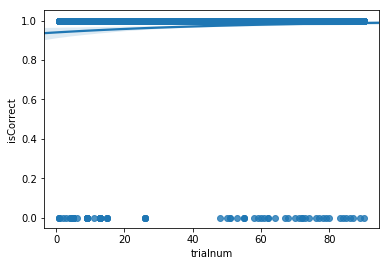

In [82]:
sns.regplot(x='trialnum', y='isCorrect', data=df_good, logistic=True)

In [85]:
df_good.groupby(['subject', 'trialnum'])['isCorrect'].astype(int).mean()

AttributeError: Cannot access callable attribute 'astype' of 'SeriesGroupBy' objects, try using the 'apply' method

## Do all subjects show a difference in response time between the Congruent and Incogruent conditions, or is this just coming from a few subjects?

Plot a histogram of the difference in mean log reaction times between conditions for each subject.  What do you think, should anyone be rejected?

## Plot the mean reaction times for each condition, for each subject.

## Participant Response Speed vs Size of Stroop Effect
Make a scatter plot showing the relationship between how quickly subjects responded for congruent and incongruent stimuli (mean response to each stimulus category)!